In [ ]:
!pip install --upgrade --no-cache-dir gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=25b5919f3c53f7efe11ad29ee3407657feaca81df2b2ead0f43433461733a6eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-x6nr5x7e/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.1
    Uninstalling gdown-4.2.1:
      Successfully uninstalled gdown-4.2.1


In [ ]:
!gdown --id 1J0_HW4H8o8GBt53J7Dhh_oHOLP6_N_8h
!unzip impressions.csv.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1J0_HW4H8o8GBt53J7Dhh_oHOLP6_N_8h
To: /content/impressions.csv.zip
100% 1.71G/1.71G [00:12<00:00, 139MB/s]
Archive:  impressions.csv.zip
  inflating: reportinghour.csv       


In [ ]:
!pip install Fitter

     |████████████████████████████████| 47 kB 2.9 MB/s 
  Created wheel for Fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=a9c271b76c1f4cf9e87ceee0686f6c9de5d6bb16b134d492ae310fc1f187fcde
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=b43e966d421b9ec8691e3faff893cab9e6650032ef0609477e181f4dedd8e95d
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built Fitter easydev


In [ ]:
import pandas as pd
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import preprocessing, linear_model
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.compose import make_column_selector, make_column_transformer
import matplotlib.pyplot as plt
import joblib
#%matplotlib notebook
%matplotlib inline
plt.style.use("seaborn")

In [ ]:
def set_seed():
  # Set random seeds (for reproducibility requirement)
  os.environ['PYTHONHASHSEED']=str(1)
  np.random.seed(1)
  random.seed(1)

def read_data(f_name):
  
  p = 0.01  # 1% of the lines
  # keep the header, then take only 1% of lines
  # if random from [0,1] interval is greater than 0.01 the row will be skipped
  df = pd.read_csv(
          f_name,
          header=0, 
          skiprows=lambda i: i>0 and random.random() > p)
  return df

In [ ]:
f_name = 'reportinghour.csv'
set_seed()
data = read_data(f_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (6,24) have mixed types.Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data.columns

Index(['Id', 'CreativeId', 'ScreenId', 'VenueId', 'SupplierNetworkId',
       'SupplierId', 'Province', 'Country', 'City', 'OrderId', 'LineId',
       'AssignmentId', 'Date', 'Impressions', 'AdsServed', 'TotalPrice',
       'OwnerId', 'CreatedOn', 'OwnerOrganizationId', 'NumberOfScreens',
       'NetworkId', 'ProductId', 'PriceNoMarkup', 'ExchangeId', 'DealId',
       'ModifiedOn', 'SyncedToRedshift', 'LastSyncedToRedshift',
       'InvoiceItemId'],
      dtype='object')

In [ ]:
'''
id - optional
creativeId - pandas label categorize (to group input, not in prediction data)
screenId - pandas label categorize
venueId - many to one mapping

SupplierNetworkId - looks like the same but to be checked. If same, not relevant
SupplierId - looks like the same but to be checked. If same, not relevant

related to screen id
Province - [Québec, Ontario] to be checked 
Country  - Canada to be checked
city - [Montreal, Toronto]
LineId - [511 552] to be checked
Order ids - [182 212] to be checked
Assignment id -  [122 133] to be checked

Date - year, month, season, day, weekday/end, time(24hrs)

impressions
AdsServed - [40] to be checked
TotalPrice - [0.0] to be checked
OwnerId, OwnerOrganizationId, NumberOfScreens	- 1 to be checked
'''

'\nid - optional\ncreativeId - pandas label categorize (to group input, not in prediction data)\nscreenId - pandas label categorize\nvenueId - many to one mapping\n\nSupplierNetworkId - looks like the same but to be checked. If same, not relevant\nSupplierId - looks like the same but to be checked. If same, not relevant\n\nrelated to screen id\nProvince - [Québec, Ontario] to be checked \nCountry  - Canada to be checked\ncity - [Montreal, Toronto]\nLineId - [511 552] to be checked\nOrder ids - [182 212] to be checked\nAssignment id -  [122 133] to be checked\n\nDate - year, month, season, day, weekday/end, time(24hrs)\n\nimpressions\nAdsServed - [40] to be checked\nTotalPrice - [0.0] to be checked\nOwnerId, OwnerOrganizationId, NumberOfScreens\t- 1 to be checked\n'

In [ ]:
# print("Country names: ", np.unique(data['Country']))  #ignore country
# print("City names: ", np.unique(data['City']))
# print("Order ids: ", np.unique(data.OrderId))
# print("Line ids: ", np.unique(data.LineId))
# print("Assignment id: ", np.unique(data.AssignmentId))
# print("Screen ids: ", np.unique(data.ScreenId))

# def select(data):
#   selected_cols = []
#   for n in data.columns:
#     if len(np.unique(data[n])) >= 30:
#       selected_cols.append(True)
#     else:
#       selected_cols.append(False)
#   return selected_cols

data = data.dropna(axis=1,how='all')
# ignore features that has unique values less than 30
# selected_cols = select(data)
# data = data.loc[:,selected_cols]
# convert date to features. 
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M:%S +00:00')
assert data['Date'].isnull().sum() == 0, "missing Date"
# data['Date_year'] = data['Date'].dt.year
# data['Date_month'] = data['Date'].dt.month
# data['Date_week'] = data['Date'].dt.isocalendar().week
# data['Date_day'] = data['Date'].dt.day
data['Date_hour'] = data['Date'].dt.hour
data['Date_dayofweek'] = data['Date'].dt.dayofweek


In [ ]:
# data.to_csv(os.path.join(os.getcwd(), 'processed.csv'), index=False)

In [ ]:
# ignored 'CreatedOn' and 'PriceNoMarkup' features
# and deleted the Date column
data = data[np.array(['Id', 'ScreenId', 'VenueId', 'City', 'Impressions', 'NumberOfScreens', 'Date_hour', 'Date_dayofweek'])]
data

,Id,ScreenId,VenueId,City,Impressions,NumberOfScreens,Date_hour,Date_dayofweek
0,7028764,2231,911,Montréal,0.000000,1,21,4
1,7028842,1777,911,Montréal,14.000000,1,3,1
2,7028930,1777,911,Montréal,21.760000,1,19,3
3,7029138,1777,911,Montréal,7.260000,1,8,3
4,7029215,1451,746,Toronto,3.630000,1,0,4
...,...,...,...,...,...,...,...,...
554492,62977823,1933253,169122,Overland Park,2.000000,1,1,5
554493,62977936,1239355,46041,Lees Summit,39.408253,1,2,5
554494,62978110,1241710,47041,Auburn,6.568704,1,2,5
554495,62978264,1336965,71604,NaN,12.189752,1,2,5


In [ ]:
# data['Id'] = data['Id'].astype('object')
# data['ScreenId'] = data['ScreenId'].astype('object')
# data['VenueId'] = data['VenueId'].astype('object')
# data['OrderId'] = data['OrderId'].astype('object')
# data['LineId'] = data['LineId'].astype('object')
# data['AssignmentId'] = data['AssignmentId'].astype('object')

In [ ]:
data.dtypes

In [ ]:
X = data[['ScreenId', 'VenueId', 'City', 'NumberOfScreens', 'Date_hour', 'Date_dayofweek']]
y = data['Impressions']
X, y = shuffle(X, y)
label_encoder = preprocessing.LabelEncoder()
normalizer = preprocessing.StandardScaler()
# Ord_enc = preprocessing.OrdinalEncoder()
X['City'] = label_encoder.fit_transform(X['City'])
X['Date_hour'] = (X['Date_hour'] - np.mean(X['Date_hour'])) / np.std(X['Date_hour']) 
X['Date_dayofweek'] = (X['Date_dayofweek'] - np.mean(X['Date_dayofweek'])) / np.std(X['Date_dayofweek'])
X['NumberOfScreens'] = (X['NumberOfScreens'] - np.mean(X['NumberOfScreens'])) / np.std(X['NumberOfScreens'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [ ]:
X_test

,ScreenId,VenueId,City,NumberOfScreens,Date_hour,Date_dayofweek
443029,1337874,72379,1592,-0.132027,-0.959512,-1.519371
7261,1861,952,189,-0.132027,-0.959512,0.529283
132203,14150,6932,559,-0.132027,-0.665987,1.553611
473324,1473709,76596,1241,-0.132027,0.214588,1.553611
215245,608969,963,189,-0.132027,1.095163,-0.495044
...,...,...,...,...,...,...
121660,1282,657,1418,-0.132027,-0.519224,1.041447
455107,1582053,83808,1592,-0.132027,0.214588,-1.519371
10052,1617,829,189,-0.132027,1.388688,0.017120
171794,555065,3041,1418,-0.132027,0.948400,0.017120


In [ ]:
X.dtypes

In [ ]:
# cat_selector = make_column_selector(dtype_include=int)
# num_selector = make_column_selector(dtype_include=float) # abstract all numerical type
# # cat_selector(X)
# # num_selector(X)
# cat_linear_processor = preprocessing.OneHotEncoder()
# num_linear_processor = preprocessing.StandardScaler()

# # tuples of the form (transformer, columns)
# # preprocessor for linear regressors
# linear_preprocessor = make_column_transformer(
#     (num_linear_processor, num_selector), 
#     (cat_linear_processor, cat_selector)
# )

# # preprocessor for tree regressor
# cat_tree_processor = preprocessing.OrdinalEncoder()
# tree_preprocessor = make_column_transformer(
#     (cat_tree_processor, cat_selector)
# )

In [ ]:
DecisionT_model = DecisionTreeRegressor(max_depth=20) # loss function defaults to squared_error
lin_model = linear_model.LinearRegression()
las_reg = linear_model.LassoCV(alphas=np.arange(1, 10)) # not sure if lasso is good since we probably wouldn't have many useful features. Alphas are set automatically
gbdt_model = HistGradientBoostingRegressor()
#||y - Xw||^2_2 + alpha * ||w||^2_2, alpha needs to be tuned, defaults: leave-one-out CV and alphas = (0.1, 1.0, 10)

estimators = [
                ('DT', DecisionT_model),
                ('las', las_reg),
                ('gbdt',gbdt_model)
             ]
# stacking a list of regressors and use Ridge regressor as the final regressor 
reg_ensemble = StackingRegressor(
    estimators=estimators,
    final_estimator=linear_model.RidgeCV(alphas=np.arange(0.1, 1.0, 10))
)


train and evaluate 

In [ ]:
fitted = reg_ensemble.fit(X_train, y_train)
y_pred = fitted.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

104555.00123610173


In [ ]:
def adapt_input(json_input):
    data = pd.DataFrame(json_input)
    data['schedule'] = pd.to_datetime(data['schedule'], format="%a-%H")
    assert data['schedule'].isnull().sum() == 0, "missing Date"
    data['Date_hour'] = data['schedule'].dt.hour
    data['Date_dayofweek'] = data['schedule'].dt.dayofweek
    return data

data = {
  "ScreenId": [222,323,345],
  "schedule": [
    "Wed-00",
    "Wed-01", 
    "Tue-03", 
  ]
}

xx_test = adapt_input(data)

In [ ]:
xx_test

,ScreenId,schedule,Date_hour,Date_dayofweek
0,222,1900-01-01 00:00:00,0,0
1,323,1900-01-01 01:00:00,1,0
2,345,1900-01-01 03:00:00,3,0


In [ ]:
# fitted.predict(xx_test)
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
Venueids = X_train['VenueId'].values
City = X_train['City'].values
NumberOfScreens = X_train['NumberOfScreens'].values


(array([3.74036e+05, 4.25400e+03, 0.00000e+00, 1.15500e+03, 0.00000e+00,
        4.97000e+03, 0.00000e+00, 6.93000e+02, 6.50000e+02, 0.00000e+00,
        2.52000e+02, 0.00000e+00, 8.08000e+02, 0.00000e+00, 1.28000e+02,
        1.83000e+02, 0.00000e+00, 6.90000e+01, 0.00000e+00, 5.04000e+02,
        0.00000e+00, 3.70000e+01, 8.10000e+01, 0.00000e+00, 5.30000e+01,
        0.00000e+00, 6.70000e+01, 0.00000e+00, 1.60000e+01, 5.70000e+01,
        0.00000e+00, 5.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 5.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        6.00000e+00, 0.00000e+00, 7.00000e+00, 1.70000e+01, 0.00000e+00,
        1.80000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.10000e+01,
        8.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.30000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.70000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00

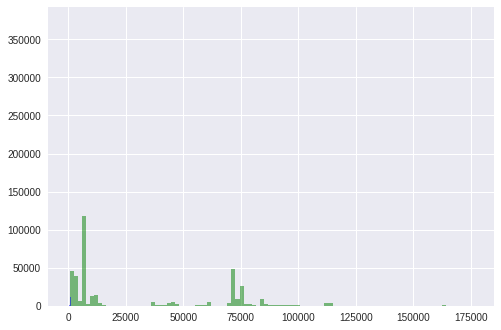

In [ ]:
kwargs = dict(alpha=0.5, bins=100)

plt.hist(Venueids, **kwargs, color='g', label='Venueids')
plt.hist(City, **kwargs, color='b', label='City')
plt.hist(NumberOfScreens, **kwargs, color='r', label='NumberOfScreens')


In [ ]:
f = Fitter(NumberOfScreens,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 0.0010705166428561748, 'scale': 1.017857709459232}}

In [ ]:
xxtest_NumberOfScreens = 

In [ ]:
# Prediction
# print("Before save:",reg_ensemble.predict(X_test))
joblib.dump(reg_ensemble, 'DT_las_gbdt.pkl')

['DT_las_gbdt.pkl']

In [ ]:
my_model = joblib.load('DT_lin_las.pkl') 
# Use the loaded model to make predictions 
y_pred = my_model.predict(X_test)
print("DT_lin_Las MSE:", mean_squared_error(y_test, y_pred))

DT_lin_Las MSE: 120310.75912457399


In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict


def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot(
        [y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "--r", linewidth=2
    )
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    extra = plt.Rectangle(
        (0, 0), 0, 0, fc="w", fill=False, edgecolor="none", linewidth=0
    )
    ax.legend([extra], [scores], loc="upper left")
    title = title + "\n Evaluation in {:.2f} seconds".format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", reg_ensemble)]
):
    start_time = time.time()
    score = cross_validate(
        est, X, y, scoring=["r2", "neg_mean_absolute_error"], n_jobs=2, verbose=0
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=2, verbose=0)

    plot_regression_results(
        ax,
        y,
        y_pred,
        name,
        (r"$R^2={:.2f} \pm {:.2f}$" + "\n" + r"$MAE={:.2f} \pm {:.2f}$").format(
            np.mean(score["test_r2"]),
            np.std(score["test_r2"]),
            -np.mean(score["test_neg_mean_absolute_error"]),
            np.std(score["test_neg_mean_absolute_error"]),
        ),
        elapsed_time,
    )

plt.suptitle("Single predictors versus stacked predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [ ]:
# from sklearn.ensemble import AdaBoostRegressor

# AdaBR = AdaBoostRegressor(
#     DecisionTreeRegressor(max_depth=4), n_estimators=100
# )

# AdaBR.fit(X_train, y_train)
# y_pred = AdaBR.predict(X_test)
# print(mean_squared_error(y_test, y_pred))

In [ ]:
def plot_cv_results(ax, xs, ys, model_name, x_axis_name, y_axis_name, labels):
    for x, y, label in zip(xs, ys, labels):
      ax.plot(x, y, alpha=0.5, label=label)
      
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlabel(x_axis_name)
    ax.set_ylabel(y_axis_name)
    ax.legend(loc="upper left")
    title = model_name + 'CV'
    ax.set_title(title)


In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
max_depths = np.arange(5, 60, 5)
DT_cv_test_results = []
DT_cv_train_results = []
for max_depth in max_depths:
  DecisionT_model = DecisionTreeRegressor(max_depth=max_depth)
  DT_cv_result = cross_validate(DecisionT_model, X, y, 
                            scoring=['r2'],
                            return_train_score=True)
  DT_cv_test_results.append(np.mean(DT_cv_result['test_r2']))
  DT_cv_train_results.append(np.mean(DT_cv_result['train_r2']))

xs = [max_depths, max_depths]
ys = [DT_cv_train_results, DT_cv_test_results]
plot_cv_results(axs, xs, ys, "DecisionTree", "max_depths", "R^2", ["train","test"])


In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
alphas = np.arange(1, 10)
Lasso_cv_test_results = []
Lasso_cv_train_results = []
for alpha in alphas:
  Lasso = linear_model.Lasso(alpha)
  Lasso_cv_result = cross_validate(Lasso, X, y, 
                              scoring=['r2'],
                              return_train_score=True)
  Lasso_cv_test_results.append(np.mean(Lasso_cv_result['test_r2']))
  Lasso_cv_train_results.append(np.mean(Lasso_cv_result['train_r2']))  

ys = [Lasso_cv_train_results, Lasso_cv_test_results]
xs = [alphas, alphas]
plot_cv_results(axs, xs, ys, "Lasso", "alphas", "R^2", ["train","test"])


In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
#linear regression
Lin_cv_test_results = []
Lin_cv_train_results = []
for i in range(10):
  Lin_model = linear_model.LinearRegression()
  Lin_cv_result = cross_validate(Lin_model, X, y, 
                              scoring=['r2'],
                              return_train_score=True)
  Lasso_cv_test_results.append(np.mean(Lin_cv_result['test_r2']))
  Lasso_cv_train_results.append(np.mean(Lin_cv_result['train_r2']))  

ys = [Lin_cv_train_results, Lin_cv_test_results]
xs = [np.linspace(0,10,100), np.linspace(0,10,100)]
plot_cv_results(axs, xs, ys, "Linear", "times", "R^2", ["train","test"])


In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
#ridge regression
alphas = np.arange(1, 10)
Ridge_cv_test_results = []
Ridge_cv_train_results = []
for alpha in alphas:
  Ridge = linear_model.Ridge(alpha)
  Ridge_cv_result = cross_validate(Ridge, X, y, 
                              scoring=['r2'],
                              return_train_score=True)
  Ridge_cv_test_results.append(np.mean(Ridge_cv_result['test_r2']))
  Ridge_cv_train_results.append(np.mean(Ridge_cv_result['train_r2']))  

ys = [Ridge_cv_train_results, Ridge_cv_test_results]
xs = [alphas, alphas]
plot_cv_results(axs, xs, ys, "Ridge", "alphas", "R^2", ["train","test"])